# Hacktiv8 Phase 0: Graded Challenge 1

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Basic Python, Numpy, serta Data Preparation with Pandas.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Pokemon Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/International_Pok%C3%A9mon_logo.svg/2560px-International_Pok%C3%A9mon_logo.svg.png)

### Dataset

Dataset yang digunakan dalam project ini adalah dataset **_Pokemon_**. Dataset ini berisi 800 pokemon dengan 13 kolom yang diantaranya adalah id, name, type 1, type 2, total stats, hp, attack, defense, special attack, special defense, speed, generation, dan rarity. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/abcsds/pokemon).

Kolom pada dataset ini adalah:

| Feature    | Description                                                                            |
| ---------- | -------------------------------------------------------------------------------------- |
| #          | ID for each pokemon                                                                    |
| Name       | Name of each pokemon                                                                   |
| Type 1     | Each pokemon has a type, this determines weakness/resistance to attacks                |
| Type 2     | Some pokemon are dual type and have 2                                                  |
| Total      | Sum of all stats that come after this                                                  |
| HP         | Hit points, or health, defines how much damage a pokemon can withstand before fainting |
| Attack     | The base modifier for normal attacks (eg. Scratch, Punch)                              |
| Defense    | The base damage resistance against normal attacks                                      |
| SP Atk     | The base damage resistance against normal attacks                                      |
| SP Def     | The base damage resistance against special attacks                                     |
| Speed      | Determines which pokemon attacks first each round                                      |
| Generation | Generation of each pokemon                                                             |
| Legendary  | Rarity of each pokemon                                                                 |


### Objectives

Tujuan dalam project ini adalah untuk mencari:

- Pokemon dengan tipe apa yang paling banyak menjadi pokemon legendary?
- Berapa perbedaan total stats antara pokemon legendary dengan pokemon normal?

## Import Library

Mengimport semua library yang akan digunakan, dalam project ini hanya menggunakan ***Pandas*** dan ***NumPy***.

In [1]:
import pandas as pd
import numpy as np

## Data Loading

Membuat dataframe dari file `pokemon.csv`.

In [2]:
pokemon = pd.read_csv('pokemon.csv')

Melihat 5 baris teratas dari dataframe pokemon.

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Data Characteristics

In [4]:
pokemon.shape # Melihat bentuk dari dataframe

(800, 13)

Dataset ini terdiri dari 800 rows dan 13 columns.

In [5]:
pokemon.info() # Melihat basic info dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Dataset ini terdiri dari:
- 1 kolom dengan tipe data boolean
- 9 kolom dengan tipe data integer
- 3 kolom dengan tipe data object

Dari info tersebut juga dapat dilihat ada sebuah kolom yang sebagian dari nilainya tidak terisi.

In [6]:
pokemon.describe().T # Menampilkan summary statistics dari dataframe

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


Dari hasil di atas kita dapat melihat summary statistics dari kolom dataframe dengan tipe data numeric seperti rata-rata, standar deviasi, quartile, nilai minimum, dan nilai maksimum.

## Data Cleansing

### Missing Value

In [7]:
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
pokemon[pokemon['Type 2'].isna()].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


Terdapat 386 baris data yang tidak memiliki nilai pada kolom ***Type 2***.

### Drop Column

Karena terdapat missing value pada kolom Type 2 dan pada project ini kolom ***Type 2***, ***#***, dan ***Generation*** tidak digunakan maka akan dihilangkan.

In [9]:
pokemon = pokemon.drop(columns=['#', 'Type 2', 'Generation'])
pokemon.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,False
1,Ivysaur,Grass,405,60,62,63,80,80,60,False
2,Venusaur,Grass,525,80,82,83,100,100,80,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,False
4,Charmander,Fire,309,39,52,43,60,50,65,False


In [10]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       800 non-null    object
 1   Type 1     800 non-null    object
 2   Total      800 non-null    int64 
 3   HP         800 non-null    int64 
 4   Attack     800 non-null    int64 
 5   Defense    800 non-null    int64 
 6   Sp. Atk    800 non-null    int64 
 7   Sp. Def    800 non-null    int64 
 8   Speed      800 non-null    int64 
 9   Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(2)
memory usage: 57.2+ KB


In [11]:
pokemon.isna().sum()

Name         0
Type 1       0
Total        0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
Legendary    0
dtype: int64

Setelah dilakukan penghilangan kolom tidak terdapat lagi missing value pada dataframe dan kolom #, Type 2, dan Generation juga sudah hilang.

### Rename Column

Pada bagian ini akan dilakukan perubahan nama kolom dataframe untuk memudahkan pemanggilan kolom.

In [12]:
old_names = list(pokemon.columns) # Membuat list dari nama kolom dataframe
new_names = ['name', 'type', 'total', 'hp', 'atk', 'def', 'sp_atk', 'sp_def', 'spd', 'legendary'] # membuat list nama kolom baru untuk dataframe

Dataframe sebelum dilakukan perubahan nama kolom:

In [13]:
pokemon.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,False
1,Ivysaur,Grass,405,60,62,63,80,80,60,False
2,Venusaur,Grass,525,80,82,83,100,100,80,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,False
4,Charmander,Fire,309,39,52,43,60,50,65,False


Melakukan perubahan nama kolom dataframe.

In [14]:
pokemon = pokemon.rename(columns=dict(zip(old_names, new_names)))

Dataframe setelah dilakukan perubahan nama kolom:

In [15]:
pokemon.head()

,name,type,total,hp,atk,def,sp_atk,sp_def,spd,legendary
0,Bulbasaur,Grass,318,45,49,49,65,65,45,False
1,Ivysaur,Grass,405,60,62,63,80,80,60,False
2,Venusaur,Grass,525,80,82,83,100,100,80,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,False
4,Charmander,Fire,309,39,52,43,60,50,65,False


## Data Exploration

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [16]:
pokemon.groupby('legendary').size()

legendary
False    735
True      65
dtype: int64

<AxesSubplot:title={'center':'Legendary Pokemon Percentage'}>

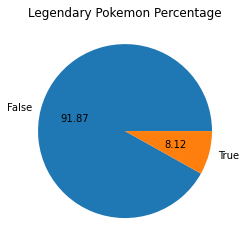

In [36]:
pokemon.groupby('legendary').size().plot(kind='pie', autopct='%.2f', ylabel='', title='Legendary Pokemon Percentage')

Dari 800 data pokemon yang ada, hanya 65 pokemon atau 8.12% pokemon saja yang memiliki rarity legendary.

### 1. Pokemon dengan tipe apa yang paling banyak menjadi pokemon legendary?

Membuat dataframe baru yang berisi semua pokemon dengan rarity legendary.

In [17]:
legendary_pokemon = pokemon[pokemon.legendary == True]
legendary_pokemon.head()

,name,type,total,hp,atk,def,sp_atk,sp_def,spd,legendary
156,Articuno,Ice,580,90,85,100,95,125,85,True
157,Zapdos,Electric,580,90,90,85,125,90,100,True
158,Moltres,Fire,580,90,100,90,125,85,90,True
162,Mewtwo,Psychic,680,106,110,90,154,90,130,True
163,MewtwoMega Mewtwo X,Psychic,780,106,190,100,154,100,130,True


In [18]:
legendary_pokemon.shape

(65, 10)

Dataframe legendary_pokemon ini berisi 65 rows dan 10 column.

In [19]:
legendary_pokemon.groupby('type').size().sort_values(ascending=False)

type
Psychic     14
Dragon      12
Fire         5
Water        4
Steel        4
Rock         4
Ground       4
Electric     4
Grass        3
Normal       2
Ice          2
Ghost        2
Flying       2
Dark         2
Fairy        1
dtype: int64

<AxesSubplot:title={'center':'Most Frequent Type In Legendary Pokemon'}, ylabel='type'>

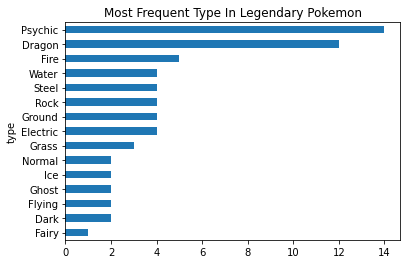

In [37]:
legendary_pokemon.groupby('type').size().sort_values().plot(kind='barh', title='Most Frequent Type In Legendary Pokemon')

Hasil grouping diatas menampilkan tipe pokemon yang paling sering muncul menjadi legendary pokemon, yaitu pokemon dengan tipe ***Psychic*** sebanyak 14 pokemon dan pokemon dengan tipe ***Dragon*** sebanyak 12 pokemon.

#### Membuat pie chart untuk melihat persentase pokemon dengan tipe ***Psychic*** dan ***Dragon*** yang menjadi legendary pokemon.

<AxesSubplot:title={'center':'Psychic Type Legendary Percentage'}, ylabel='Psychic'>

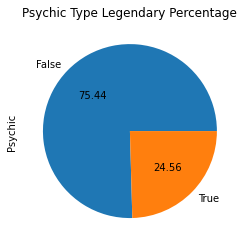

In [21]:
pokemon[pokemon.type == 'Psychic'].groupby('legendary').size().plot(kind='pie', autopct='%.2f', ylabel='Psychic', title='Psychic Type Legendary Percentage')

Dari semua pokemon yang bertipe Psychic sekitar 25% menjadi legendary pokemon.

<AxesSubplot:title={'center':'Dragon Type Legendary Percentage'}, ylabel='Dragon'>

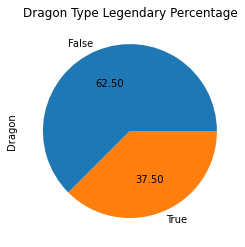

In [22]:
pokemon[pokemon.type == 'Dragon'].groupby('legendary').size().plot(kind='pie', autopct='%.2f', ylabel='Dragon', title='Dragon Type Legendary Percentage')

Dari semua pokemon yang bertipe Dragon sekitar 38% menjadi legendary pokemon.

### 2. Berapa perbedaan total stats antara pokemon legendary dengan pokemon normal?

In [47]:
legendary_stat_mean = pokemon[pokemon.legendary == True].total.mean() # Menghitung rata-rata total stats pokemon legendary
print(f'Legendary pokemon average total stats: {legendary_stat_mean:.2f}')

Legendary pokemon average total stats: 637.38


Pokemon dengan rarity legendary memiliki rata-rata total stats sebesar 637.38 points.

In [48]:
normal_stat_mean = pokemon[pokemon.legendary == False].total.mean() # Menghitung rata-rata total stats pokemon normal
print(f'Normal pokemon average total stats: {normal_stat_mean:.2f}')

Normal pokemon average total stats: 417.21


Pokemon dengan rarity normal memiliki rata-rata total stats sebesar 417.21 points.

In [45]:
total_stat_difference = abs(legendary_stat_mean - normal_stat_mean)
print(f'Difference average total stats between legendary pokemon and normal pokemon around {round(total_stat_difference)} points.')

Difference average total stats between legendary pokemon and normal pokemon around 220 points.


Dari hasil perhitungan di atas dapat diketahui bahwa pokemon legendary memiliki rata-rata total stats 220 points lebih besar dari pokemon normal.

In [25]:
pokemon[(pokemon.total > legendary_stat_mean) & (pokemon.legendary == False)]

,name,type,total,hp,atk,def,sp_atk,sp_def,spd,legendary
141,GyaradosMega Gyarados,Water,640,95,155,109,70,130,81,False
268,TyranitarMega Tyranitar,Rock,700,100,164,150,95,120,71,False
313,Slaking,Normal,670,150,160,100,95,65,100,False
409,SalamenceMega Salamence,Dragon,700,95,145,130,120,90,120,False
413,MetagrossMega Metagross,Steel,700,80,145,150,105,110,110,False
494,GarchompMega Garchomp,Dragon,700,108,170,115,120,95,92,False


Ditemukan beberapa pokemon dengan rarity normal tetapi memiliki total stats diatas rata-rata legendary pokemon.

## Conclusion

Kesimpulan yang dapat ditarik dari hasil data exploration ini adalah:

- ***Pokemon dengan tipe apa yang paling banyak menjadi pokemon legendary?***

Tipe pokemon ***Psychic*** dan ***Dragon*** paling banyak muncul dalam pokemon rarity legendary, namun 38% pokemon bertipe ***Dragon*** menjadi pokemon legendary sedangkan pokemon bertipe ***Psychic*** hanya 25% saja yang menjadi pokemon legendary. 

Jadi, pokemon yang paling banyak menjadi pokemon legendary adalah pokemon bertipe ***Dragon***.


- ***Berapa perbedaan total stats antara pokemon legendary dengan pokemon normal?***

Pokemon dengan rarity legendary memiliki rata-rata total stats sebesar ***637 points*** sedangkan pokemon dengan rarity normal memiliki rata-rata total stats sebesar ***417 points***. 

Jadi, perbedaan total stats antara pokemon legendary dengan pokemon normal adalah sebesar ***220 points***.

Ditemukan juga beberapa pokemon dengan rarity normal tetapi memiliki total stats diatas rata-rata pokemon legendary, yang diantaranya adalah:
- Mega Tyranitar ***(700 points)***
- Mega Salamence **(700 points)**
- Mega Metagross **(700 points)**
- Mega Garchomp ***(700 points)***
- Slaking ***(670 points)***
- Mega Gyarados ***(640 points)***